In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('',parse_dates=True,index_col='DATE')

In [7]:
df.head(24)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
1992-06-01,9182
1992-07-01,9103
1992-08-01,10513
1992-09-01,9573


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [8]:
334/12

27.833333333333332

In [9]:
df.columns=['Sales']

In [10]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


<AxesSubplot: xlabel='DATE'>

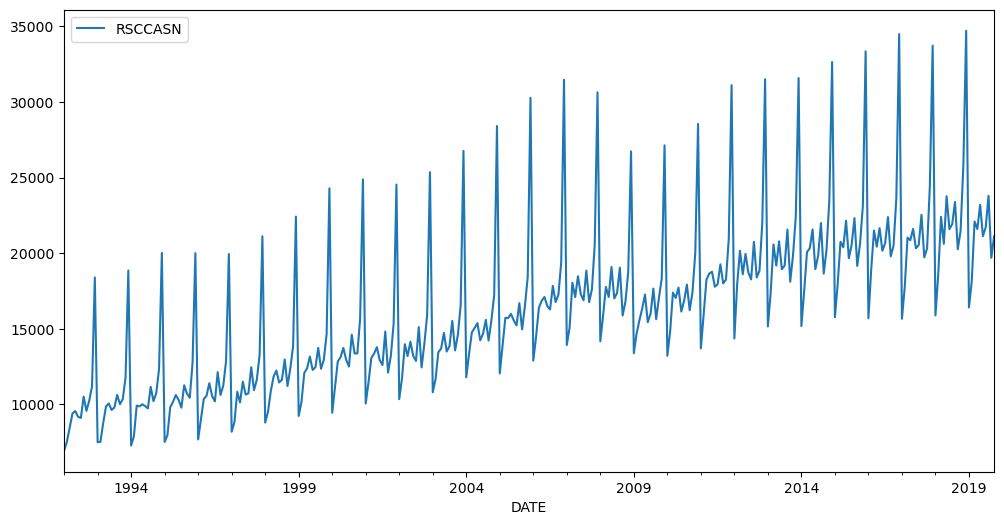

In [9]:
df.plot(figsize=(12,6))

In [12]:
len(df)

334

In [75]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [14]:
len(df)-18

316

In [16]:
test_size=18
test_idx=len(df)-test_size

In [17]:
train=df.iloc[:test_idx]
test=df.iloc[test_idx:]

In [18]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [19]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
scaler.fit(train)

MinMaxScaler()

In [23]:
scaled_train=scaler.transform(train)

In [24]:
scaled_test=scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [28]:
X,y=generator[0]

In [29]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [30]:
y

array([[0.02047633]])

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense,LSTM

In [33]:
n_features=1

In [34]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


Metal device set to: Apple M1


2023-05-20 06:08:59.643890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-20 06:08:59.644762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [38]:
val_gen=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [40]:
model.fit(generator,epochs=20,validation_data=val_gen,callbacks=[early_stop])

Epoch 1/20


2023-05-20 06:11:53.619049: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-20 06:11:54.198027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


304/304 [==============================] - ETA: 0s - loss: 0.0251

2023-05-20 06:13:07.387880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


304/304 [==============================] - 74s 236ms/step - loss: 0.0251 - val_loss: 0.0040
Epoch 2/20
304/304 [==============================] - 73s 241ms/step - loss: 0.0197 - val_loss: 0.0061


In [41]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot: >

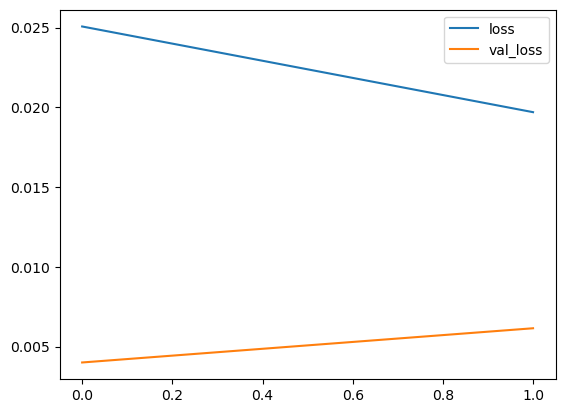

In [42]:
losses.plot()

In [43]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


2023-05-20 06:35:30.267449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 30ms/step


In [45]:
true_pred=scaler.inverse_transform(test_predictions)

In [46]:
test['Predictions']=true_pred

/var/folders/ht/hxlwm9v54vs0tfxv_n6ctkfh0000gn/T/ipykernel_62315/1680170604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_pred


In [47]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,19306.531666
2018-06-01,21589,19046.458712
2018-07-01,21919,18975.796136
2018-08-01,23381,18975.796136
2018-09-01,20260,18509.704857
2018-10-01,21473,18652.909814
2018-11-01,25831,19288.308238
2018-12-01,34706,19083.320932
2019-01-01,16410,16752.955657


<AxesSubplot: xlabel='DATE'>

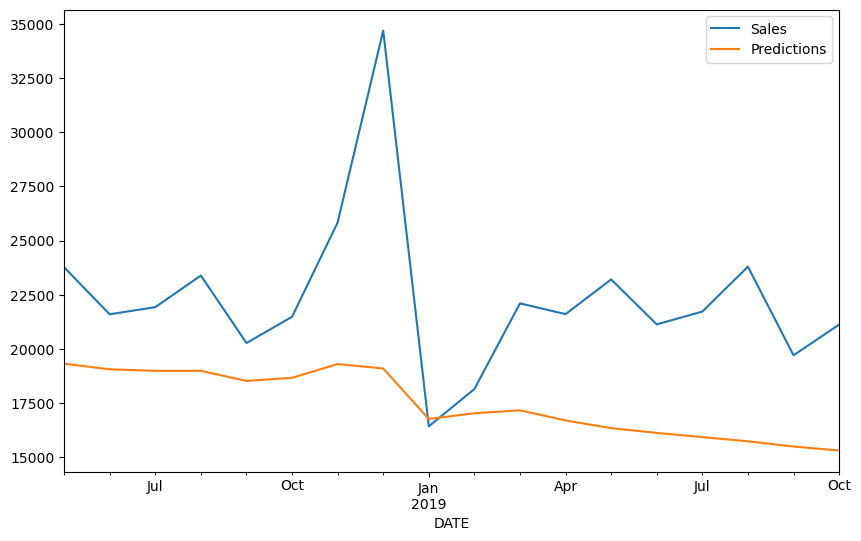

In [50]:
test.plot(figsize=(10,6))

In [52]:
full_scaler=MinMaxScaler()
full_scaler.fit(df)
scaled_fulldata=full_scaler.transform(df)

In [53]:
length=12
generator=TimeseriesGenerator(scaled_fulldata,scaled_fulldata,length=length,batch_size=1)

In [54]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=8)


Epoch 1/8


2023-05-20 06:44:19.664781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 79s 243ms/step - loss: 0.0242
Epoch 2/8
322/322 [==============================] - 78s 241ms/step - loss: 0.0193
Epoch 3/8
322/322 [==============================] - 81s 250ms/step - loss: 0.0116
Epoch 4/8
322/322 [==============================] - 80s 248ms/step - loss: 0.0059
Epoch 5/8
322/322 [==============================] - 88s 275ms/step - loss: 0.0031
Epoch 6/8
322/322 [==============================] - 105s 325ms/step - loss: 0.0030
Epoch 7/8
322/322 [==============================] - 103s 319ms/step - loss: 0.0016
Epoch 8/8
322/322 [==============================] - 86s 268ms/step - loss: 0.0016


In [60]:
forecast=[]
periods=12
first_eval_batch=scaled_fulldata[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [61]:
forecast

[array([0.65711445], dtype=float32),
 array([0.9919686], dtype=float32),
 array([0.355622], dtype=float32),
 array([0.39986065], dtype=float32),
 array([0.5023986], dtype=float32),
 array([0.4923316], dtype=float32),
 array([0.54401827], dtype=float32),
 array([0.4856508], dtype=float32),
 array([0.5044905], dtype=float32),
 array([0.57034665], dtype=float32),
 array([0.45387334], dtype=float32),
 array([0.49604243], dtype=float32)]

In [62]:
forecast=scaler.inverse_transform(forecast)

In [65]:
forecast_idx=pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [66]:
forecast_idx

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [67]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_idx,columns=['Forecast'])

<AxesSubplot: xlabel='DATE'>

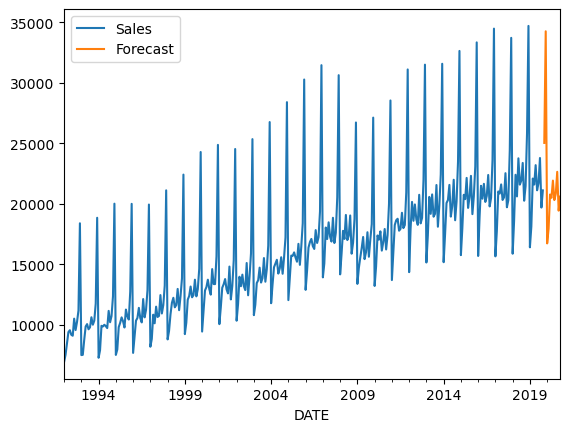

In [68]:
ax=df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

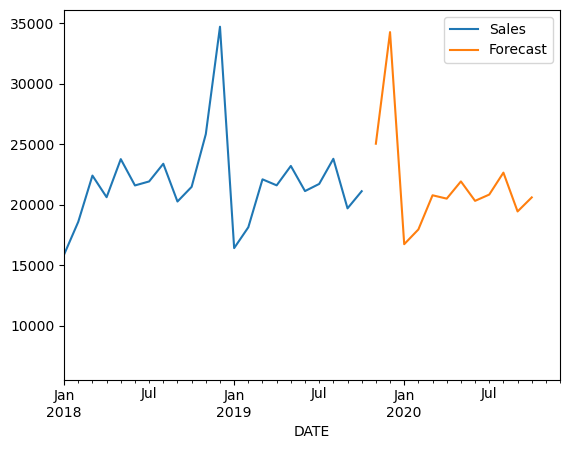

In [70]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')